In [1]:
# we're in the endgame now

from controller import *
%matplotlib inline
truth_x = np.load('./combined.npy')[:size,0]
truth_y = np.load('./combined.npy')[:size,1]

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Starting at timestep 1


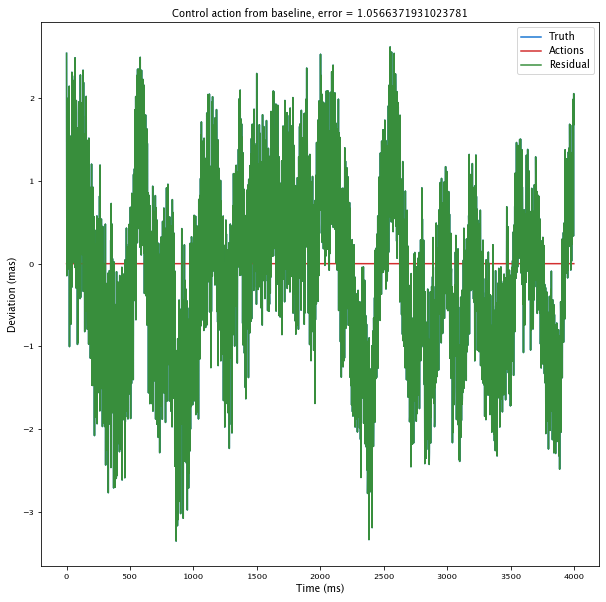

In [2]:
show_control('baseline', truth_x)

Starting at timestep 1


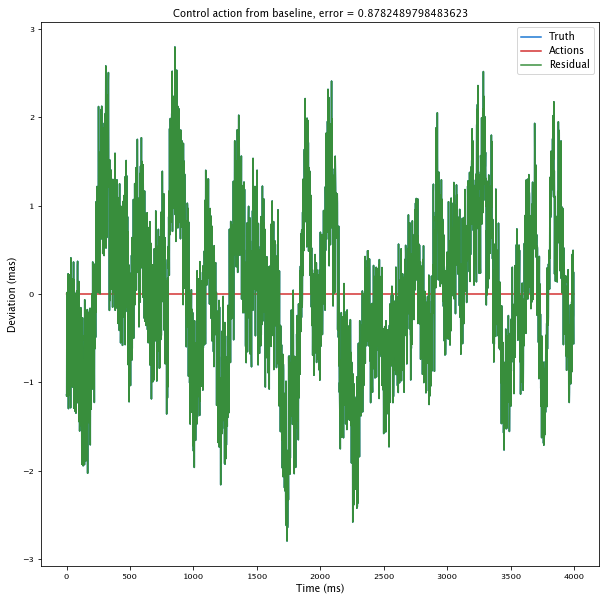

In [3]:
show_control('baseline', truth_y)

Starting at timestep 3


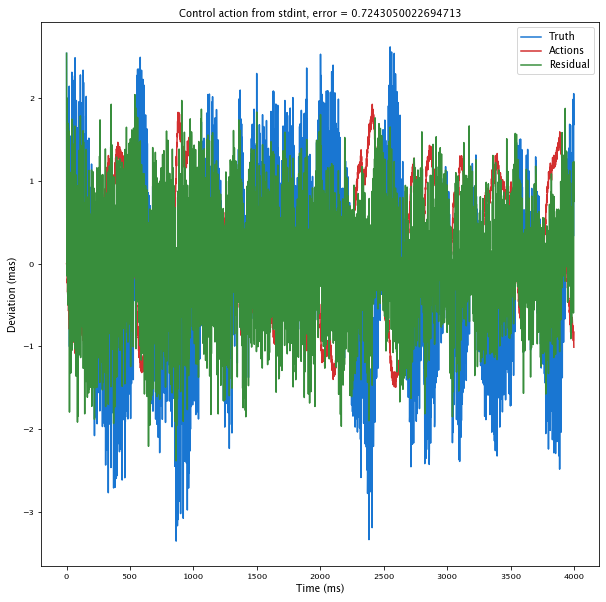

In [4]:
show_control('stdint', truth_x)

Starting at timestep 3


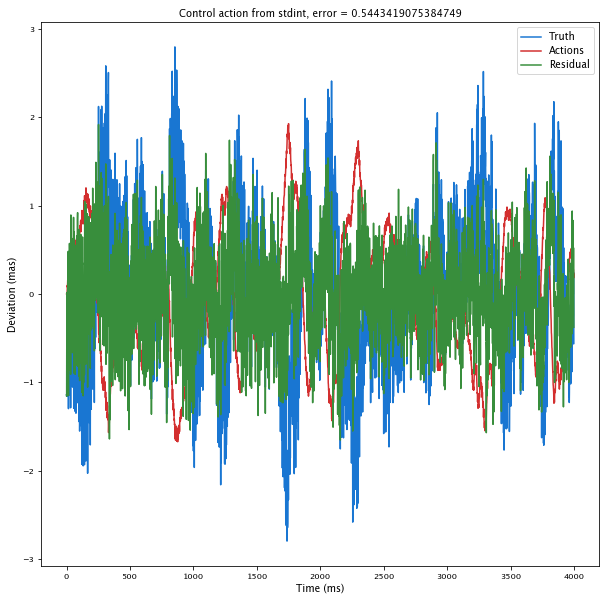

In [5]:
show_control('stdint', truth_y)

Starting at timestep 4


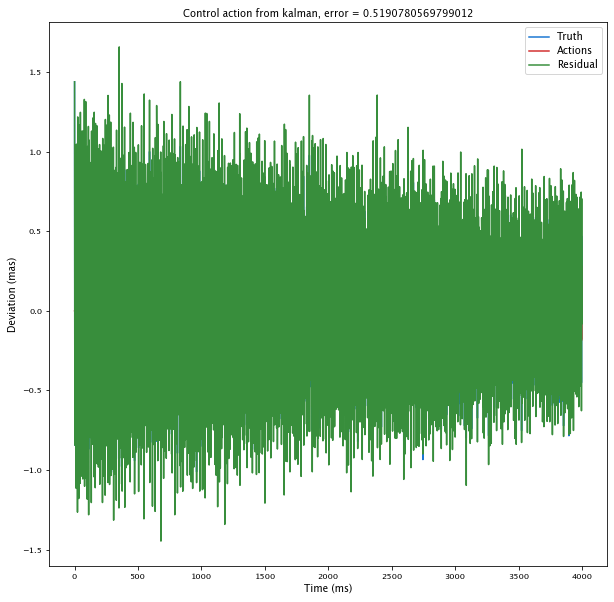

In [9]:
run, predict = vibe.kfilter.run(truth_x + np.random.normal(0, 0.06, (size,)), save_physics=True)
res_x = truth_x - run
show_control('kalman', res_x)

Starting at timestep 4


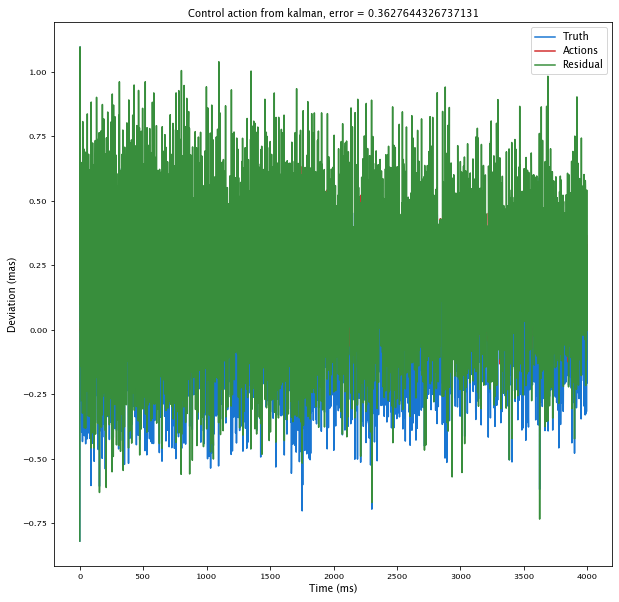

In [10]:
run, predict = vibe.kfilter.run(truth_y + np.random.normal(0, 0.06, (size,)), save_physics=True)
res_y = truth_y - predict
show_control('kalman', res_y)

Starting at timestep 3
Starting at timestep 3


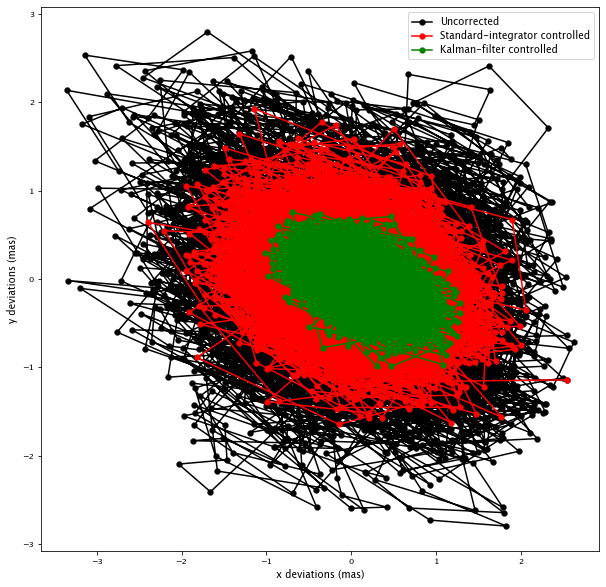

In [8]:
combined = np.load('./combined.npy')
plt.figure(figsize=(10,10))
plt.plot(combined[:,0], combined[:,1], 'ko-', label="Uncorrected")
stdint_x, _, _ = stdint.control(combined[:,0])
stdint_y, _, _ = stdint.control(combined[:,1])
plt.plot(stdint_x, stdint_y, 'ro-', label="Standard-integrator controlled")
res_real_x = np.load('./kalman_res_x.npy')
res_real_y = np.load('./kalman_res_y.npy')
plt.plot(res_real_x, res_real_y, 'go-', label="Kalman-filter controlled")
plt.xlabel("x deviations (mas)")
plt.ylabel("y deviations (mas)")
plt.legend()
plt.savefig('./rms_spots.png')